In [ ]:
# P wave - mean vector of all atrial depolarization from SA node to AV node
# the voltage is moving in the direction of positive LEAD 2 hence we get P wave
# indication of atrial depolarization

# PR segment - the AV node is holding the current , it becomes depolyrized but 
# there is no movement yet so we get a flat PR segment

# PR internal - distance from P wave beggining to PR segment end

# from the AV node there is bundle of his and then
#  are left and right bundle branches. the left bundle left primarily depolarize
# the interventricular septum with a mean vector , moving away from lead 2
# and causing Q -wave (indicitive of septal depolarization)

# as the voltage reaches the ventricles and bases , since the left ventricle is
# dominant , the mean vector will be to the to the positive electrode of lead 2
# and thus we get R wave

# S wave - as a result of positive charges moving away from lead 2 positive electrode
# in an upward direction (base ventricular polarization)

# ST segment - when the entrie ventricular myocardium is completely depolarized

# T wave - ventricular repolarization due to negative vharge moving towards negative electrode



In [ ]:
# The model will learn the pattern of P wave absence and/or 
# Iregular R-R intervals which are 2 hallmarks of Afib!
# can sometimes see chaotic baseline (not flat) which is f wave

Shape: (650000, 2)


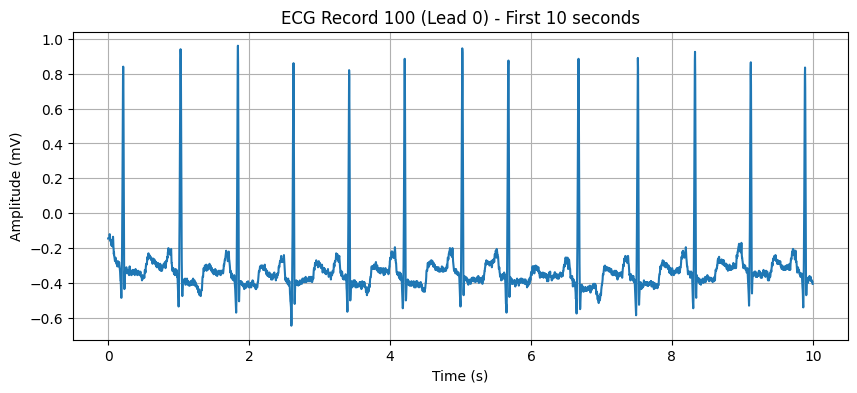

14
Average HR ≈ 79.3 bpm
360


In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# using MITBH db
record = wfdb.rdrecord('100', pn_dir='mitdb')
ann = wfdb.rdann('100', 'atr', pn_dir='mitdb')


# record.p_signal is a numpy array [samples, channels]
print("Shape:", record.p_signal.shape)  # (650000, 2) ~ 30 min @ 360 Hz, 2 leads

# Extract 10 seconds (3600 samples @ 360 Hz)
fs = record.fs  # sampling frequency
samples_10s = int(fs * 10)
ecg_segment = record.p_signal[:samples_10s, 0]  # first 10s of lead 0

# Time axis
import numpy as np
t = np.arange(samples_10s) / fs

# Plot
plt.figure(figsize=(10,4))
plt.plot(t, ecg_segment)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Record 100 (Lead 0) - First 10 seconds")
plt.grid(True)
plt.show()


# Filter annotations to only those inside the first 10s
r_peaks = ann.sample[ann.sample < samples_10s]
print(len(r_peaks))
# Compute RR intervals (in seconds)
rr_intervals = np.diff(r_peaks) / fs
mean_rr = np.mean(rr_intervals)

# Heart rate in bpm
hr = 60 / mean_rr
print(f"Average HR ≈ {hr:.1f} bpm")
print (fs)